<a href="https://colab.research.google.com/github/ivannamal/SnakeGame/blob/master/Practise_1_CVDL_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота №1
## Класифікація зображень за допомогою PyTorch

**Мета роботи: Навчитись тренувати базову нейронну мережу для класифікації зображень.**

**Вимоги:**

1.   Встановлені Python та бібліотеки PyTorch, torchvision, matplotlib.
2.   Завантажений набір даних CIFAR-10.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from torch.utils.data import DataLoader, random_split
from torchvision.utils import make_grid

In [ ]:
from torchvision.transforms import ToTensor
import torch.optim as optim

In [ ]:
training_data = torchvision.datasets.CIFAR10(
    root='/content/sample_data',
    download=True,
    train=True,
    transform=ToTensor()
)
testing_data = torchvision.datasets.CIFAR10(
    root='/content/sample_data',
    download=True,
    train=False,
    transform=ToTensor()
)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(testing_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 3, 32, 32])
Labels batch shape: torch.Size([64])


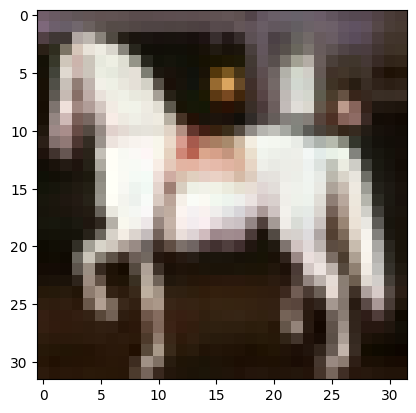

Label: 7


In [ ]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
img = img.permute(1, 2, 0)
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")


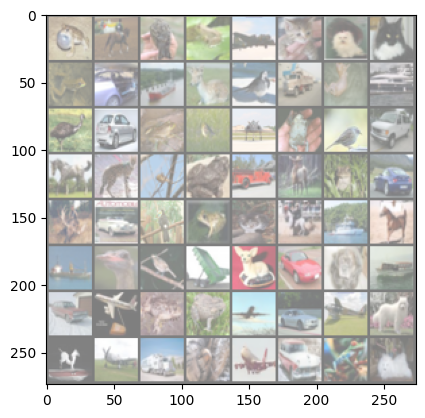

    6     7     2     6     0     3     5     3     6     1     8     4     2     9     3     8     2     1     6     2     0     6     2     1     7     3     2     6     9     4     6     1     4     1     2     6     3     7     8     7     8     2     2     9     5     1     5     8     1     0     6     6     0     1     0     5     7     0     9     3     0     1     6     5


In [ ]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


dataiter = iter(train_dataloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{labels[j].item():5d}' for j in range(64)))


# Частина 2

In [ ]:
print(f"Розмір навчального набору: {len(training_data)} зображень")
print(f"Розмір тестового набору: {len(testing_data) } зображень")

Розмір навчального набору: 50000 зображень
Розмір тестового набору: 10000 зображень


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [ ]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## Завдання до лабораторної роботи (частина І): Робота з даними (CIFAR-10)

1.   Імпортуйте необхідні бібліотеки:
```
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from torch.utils.data import DataLoader, random_split
from torchvision.utils import make_grid
```
2.   Завантаження даних. Напишіть функцію, яка завантажує набір даних CIFAR-10.
3.   Перевірка наявності даних. Напишіть код, який перевіряє, чи дані завантажені та розпаковані успішно. Виведіть повідомлення про статус завантаження.
4.   Підготовка даних. Напишіть код, щоб імплементувати трансформації для зображень:
*    перетворення в тензори;
*    денормалізація (при необхідності).  

Використайте `torchvision.transforms` для підготовки даних.
5.   Створення DataLoader. Створіть DataLoader для навчального та тестового наборів даних, щоб спростити процес завантаження даних за батчами.
6.   Візуалізація прикладів:
*   напишіть функцію для візуалізації деяких зображень з набору даних;
*   відобразіть кілька зображень з їхніми реальними мітками.
7.   Ваші висновки до частини І.

## Завдання до лабораторної роботи (частина ІІ):
0. Розділіть набір даних на навчальний і тестовий.
1. Визначення структури FNN.
    - Створіть клас для цільної нейронної мережі, яка буде містити мінімум два повнозв'язних шари.
2. Вибір функції втрати та оптимізатора:
    - визначте функцію втрат (наприклад, CrossEntropyLoss) та оптимізатор (наприклад, SGD або Adam).
3. Тренування моделі.
    - Реалізуйте цикл навчання, де:
        - модель тренується на навчальному наборі даних;
        - виводиться значення функції втрат та точність (на навчальній та валідаційній множинах) після кожної епохи.
4. Оцінка моделі:
    - визначте точність моделі на тестовому наборі даних;
    - виведіть детальні статистики (загальна точність та точність для кожного класу).
5. Візуалізація результатів:
    - візуалізуйте кілька випадкових передбачених зображень разом з їхніми реальними мітками та передбаченнями;
    - побудуйте графік точності та втрат для навчального набору даних на кожній епосі.

In [ ]:
num_epochs = 100

for epoch in range(num_epochs):
    net.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    avg_train_loss = running_loss / total_train
    train_accuracy = 100 * correct_train / total_train

    net.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    avg_val_loss = val_loss / total_val
    val_accuracy = 100 * correct_val / total_val

    print(f"Епоха {epoch+1}/{num_epochs} - "
          f"Навч. втрати: {avg_train_loss:.4f}, Точність на навч.: {train_accuracy:.2f}% | "
          f"Валід. втрати: {avg_val_loss:.4f}, Точність на валід.: {val_accuracy:.2f}%")

Епоха 1/100 - Навч. втрати: 1.6988, Точність на навч.: 37.92% | Валід. втрати: 1.6142, Точність на валід.: 41.89%
Епоха 2/100 - Навч. втрати: 1.5936, Точність на навч.: 42.44% | Валід. втрати: 1.5528, Точність на валід.: 43.68%
Епоха 3/100 - Навч. втрати: 1.5267, Точність на навч.: 44.88% | Валід. втрати: 1.5083, Точність на валід.: 45.11%
Епоха 4/100 - Навч. втрати: 1.4775, Точність на навч.: 46.58% | Валід. втрати: 1.4436, Точність на валід.: 48.03%
Епоха 5/100 - Навч. втрати: 1.4361, Точність на навч.: 48.39% | Валід. втрати: 1.4220, Точність на валід.: 48.99%
Епоха 6/100 - Навч. втрати: 1.3991, Точність на навч.: 49.74% | Валід. втрати: 1.3871, Точність на валід.: 50.13%
Епоха 7/100 - Навч. втрати: 1.3680, Точність на навч.: 51.22% | Валід. втрати: 1.3676, Точність на валід.: 50.97%
Епоха 8/100 - Навч. втрати: 1.3349, Точність на навч.: 52.20% | Валід. втрати: 1.3759, Точність на валід.: 51.10%
Епоха 9/100 - Навч. втрати: 1.3049, Точність на навч.: 53.52% | Валід. втрати: 1.3583, Т

In [ ]:
from sklearn.metrics import classification_report
net.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)


accuracy = 100.0 * np.sum(all_preds == all_labels) / len(all_labels)
print(f"Загальна точність на тестовому наборі: {accuracy:.2f}%")

class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

print("\nДокладний звіт класифікації:")
print(classification_report(all_labels, all_preds, target_names=class_names))

Загальна точність на тестовому наборі: 58.16%

Докладний звіт класифікації:
              precision    recall  f1-score   support

    airplane       0.63      0.62      0.63      1000
  automobile       0.71      0.66      0.68      1000
        bird       0.48      0.53      0.50      1000
         cat       0.42      0.32      0.36      1000
        deer       0.50      0.56      0.53      1000
         dog       0.44      0.50      0.47      1000
        frog       0.67      0.67      0.67      1000
       horse       0.63      0.61      0.62      1000
        ship       0.70      0.73      0.71      1000
       truck       0.66      0.61      0.64      1000

    accuracy                           0.58     10000
   macro avg       0.58      0.58      0.58     10000
weighted avg       0.58      0.58      0.58     10000



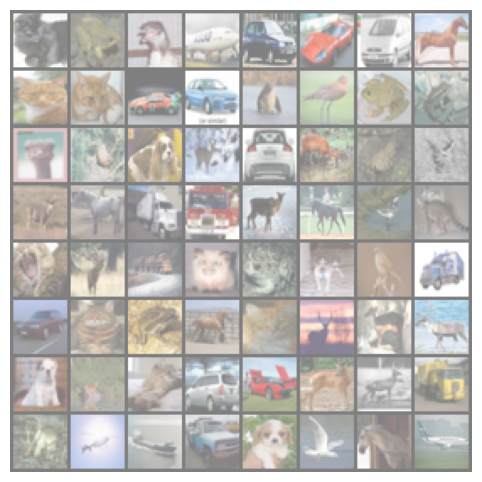

Реальні мітки:     cat        frog       bird       airplane   automobile automobile automobile horse      cat        cat        automobile automobile bird       bird       frog       frog       bird       bird       dog        deer       automobile deer       frog       deer       deer       horse      truck      truck      deer       horse      bird       cat        cat        deer       truck      cat        frog       dog        bird       truck      automobile cat        frog       horse      cat        deer       deer       deer       dog        deer       cat        automobile automobile deer       deer       truck      deer       airplane   ship       truck      dog        bird       horse      airplane  
Передбачення:      bird       frog       dog        airplane   truck      automobile bird       horse      dog        horse      airplane   automobile dog        bird       frog       cat        bird       ship       frog       horse      automobile cat        frog       deer 

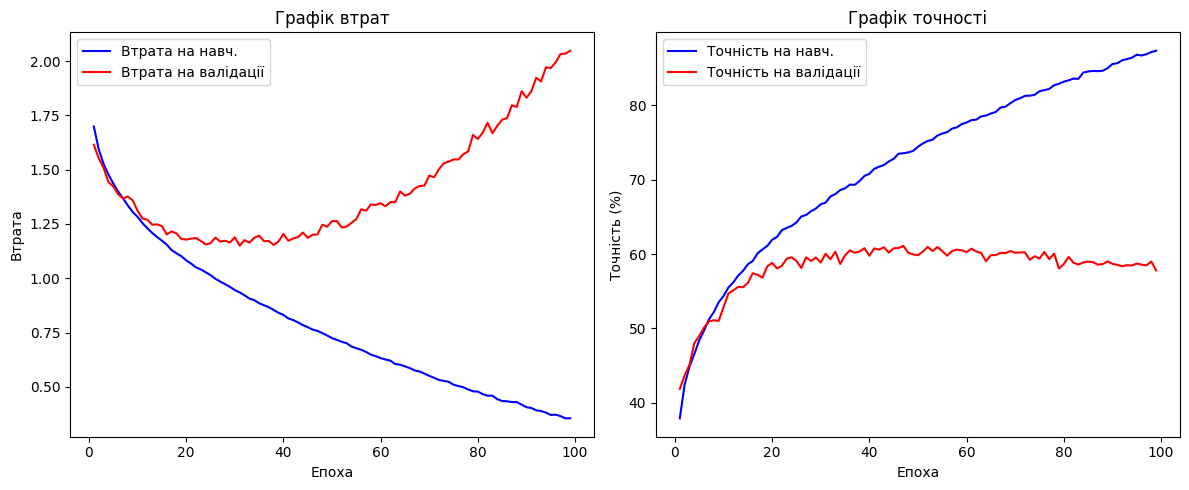

In [ ]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.figure(figsize=(8, 6))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

dataiter = iter(test_dataloader)
images, labels = next(dataiter)

net.eval()
with torch.no_grad():
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)

imshow(torchvision.utils.make_grid(images))
print("Реальні мітки:    ", ' '.join(f"{class_names[labels[j]]:10}" for j in range(len(labels))))
print("Передбачення:     ", ' '.join(f"{class_names[predicted[j]]:10}" for j in range(len(predicted))))

train_loss_history = [
    1.6988, 1.5936, 1.5267, 1.4775, 1.4361, 1.3991, 1.3680, 1.3349, 1.3049, 1.2825,
    1.2538, 1.2304, 1.2087, 1.1900, 1.1731, 1.1545, 1.1295, 1.1149, 1.1015, 1.0820,
    1.0678, 1.0502, 1.0409, 1.0278, 1.0142, 0.9977, 0.9846, 0.9726, 0.9602, 0.9455,
    0.9348, 0.9214, 0.9063, 0.8992, 0.8849, 0.8757, 0.8664, 0.8538, 0.8408, 0.8310,
    0.8151, 0.8074, 0.7969, 0.7840, 0.7747, 0.7636, 0.7576, 0.7474, 0.7364, 0.7243,
    0.7163, 0.7073, 0.7008, 0.6855, 0.6776, 0.6706, 0.6606, 0.6483, 0.6410, 0.6322,
    0.6257, 0.6204, 0.6050, 0.6021, 0.5941, 0.5862, 0.5756, 0.5705, 0.5609, 0.5507,
    0.5413, 0.5317, 0.5273, 0.5232, 0.5096, 0.5035, 0.4982, 0.4876, 0.4796, 0.4780,
    0.4664, 0.4592, 0.4593, 0.4430, 0.4347, 0.4334, 0.4299, 0.4295, 0.4179, 0.4061,
    0.4027, 0.3917, 0.3886, 0.3812, 0.3705, 0.3718, 0.3652, 0.3549, 0.3552
]
val_loss_history = [
    1.6142, 1.5528, 1.5083, 1.4436, 1.4220, 1.3871, 1.3676, 1.3759, 1.3583, 1.3104,
    1.2750, 1.2697, 1.2468, 1.2480, 1.2402, 1.2018, 1.2158, 1.2065, 1.1808, 1.1781,
    1.1821, 1.1853, 1.1720, 1.1557, 1.1615, 1.1871, 1.1686, 1.1727, 1.1647, 1.1884,
    1.1502, 1.1755, 1.1639, 1.1862, 1.1963, 1.1705, 1.1718, 1.1536, 1.1694, 1.2043,
    1.1725, 1.1831, 1.1894, 1.2104, 1.1857, 1.2005, 1.2015, 1.2464, 1.2375, 1.2631,
    1.2634, 1.2338, 1.2382, 1.2550, 1.2727, 1.3175, 1.3111, 1.3396, 1.3376, 1.3456,
    1.3313, 1.3509, 1.3502, 1.3997, 1.3806, 1.3887, 1.4130, 1.4246, 1.4265, 1.4728,
    1.4654, 1.5020, 1.5298, 1.5370, 1.5471, 1.5469, 1.5710, 1.5842, 1.6596, 1.6413,
    1.6703, 1.7157, 1.6681, 1.7018, 1.7302, 1.7376, 1.7967, 1.7885, 1.8609, 1.8311,
    1.8610, 1.9231, 1.9059, 1.9712, 1.9683, 1.9937, 2.0327, 2.0342, 2.0477
]
train_accuracy_history = [ 37.92, 42.44, 44.88, 46.58, 48.39, 49.74, 51.22, 52.20, 53.52, 54.35, 55.50, 56.19, 57.09, 57.73, 58.62, 59.06, 60.08, 60.62, 61.09, 61.92, 62.30, 63.21, 63.51, 63.78, 64.25, 65.05, 65.25, 65.75, 66.11, 66.70, 66.90, 67.75, 68.05, 68.59, 68.83, 69.33, 69.30, 69.82, 70.50, 70.78, 71.45, 71.73, 71.96, 72.44, 72.79, 73.48, 73.54, 73.65, 73.86, 74.42, 74.85, 75.19, 75.36, 75.92, 76.19, 76.38, 76.85, 77.03, 77.46, 77.68, 77.99, 78.06, 78.50, 78.61, 78.88, 79.10, 79.69, 79.80, 80.26, 80.69, 80.93, 81.25, 81.28, 81.39, 81.87, 82.03, 82.18, 82.68, 82.88, 83.16, 83.34, 83.58, 83.54, 84.38, 84.53, 84.60, 84.57, 84.63, 84.97, 85.53, 85.64, 86.03, 86.20, 86.38, 86.78, 86.68, 86.85, 87.14, 87.32 ]
val_accuracy_history = [
    41.89, 43.68, 45.11, 48.03, 48.99, 50.13, 50.97, 51.10, 51.01, 52.86,
    54.69, 55.11, 55.58, 55.55, 56.10, 57.42, 57.21, 56.82, 58.34, 58.81,
    58.06, 58.42, 59.38, 59.56, 59.07, 58.12, 59.56, 59.07, 59.54, 58.85,
    60.04, 59.29, 60.31, 58.66, 59.83, 60.49, 60.17, 60.35, 60.78, 59.77,
    60.76, 60.59, 60.91, 60.19, 60.77, 60.80, 61.09, 60.17, 59.95, 59.84,
    60.32, 60.96, 60.40, 60.94, 60.39, 59.78, 60.40, 60.59, 60.51, 60.26,
    60.72, 60.34, 60.14, 59.03, 59.85, 59.86, 60.16, 60.12, 60.40, 60.16,
    60.22, 60.21, 59.23, 59.70, 59.39, 60.28, 59.31, 60.06, 58.06, 58.65,
    59.62, 58.83, 58.59, 58.87, 58.98, 58.90, 58.58, 58.65, 59.01, 58.68,
    58.54, 58.36, 58.50, 58.46, 58.72, 58.57, 58.47, 59.00, 57.79
]

epochs = range(1, len(train_loss_history) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss_history, 'b-', label='Втрата на навч.')
plt.plot(epochs, val_loss_history, 'r-', label='Втрата на валідації')
plt.title("Графік втрат")
plt.xlabel("Епоха")
plt.ylabel("Втрата")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy_history, 'b-', label='Точність на навч.')
plt.plot(epochs, val_accuracy_history, 'r-', label='Точність на валідації')
plt.title("Графік точності")
plt.xlabel("Епоха")
plt.ylabel("Точність (%)")
plt.legend()

plt.tight_layout()
plt.show()


## Додаткові завдання (за бажанням):

- Напишіть код, який виведе кількість зображень у кожному класі в директорії train. Для цього ви можете використовувати os.listdir() для підрахунку зображень у відповідних піддиректоріях.
- Створіть графік (наприклад, гістограму), який відображає кількість зображень в кожному класі. Ви можете використовувати бібліотеку matplotlib для візуалізації.
- Виведіть кілька випадкових зображень з кожного класу разом із їхніми мітками.
- Дослідіть, як зміна параметрів підготовки даних (наприклад, різні трансформації) впливає на результати моделі.
- Спробуйте змінити архітектуру моделі (додати додаткові шари) та проаналізуйте, як це впливає на результати.
- Включіть регуляризацію (наприклад, Dropout) для покращення загальної точності.
